# Examples of poison setups and Badnets implementation

Cleaned up version of explore notebook

In [2]:
import pickle
import PIL
from IPython.display import Image 
import torch, torchvision
import learning_module

In [3]:
#poison_setups = 'poison_setups/cifar10_transfer_learning.pickle'
poison_setups = 'poison_setups/cifar10_from_scratch.pickle'
#poison_setups = 'poison_setups/tinyimagenet_transfer_learning.pickle'
#poison_setups = 'poison_setups/tinyimagenet_from_scratch.pickle'

In [4]:
with open(poison_setups, "rb") as handle:
    setup_dicts = pickle.load(handle)

In [5]:
setup_dicts[0]

{'target class': 7,
 'target index': 7762,
 'base class': 3,
 'base indices': array([ 2386, 37215, 23942, 15836, 14070, 41601, 10209, 44252, 17912,
        16273,  1785, 15106, 31740, 39885, 21727, 17614, 26244,  1059,
         4796, 30204, 24174, 43438,  8786, 21832, 27938, 46605, 18442,
        38485, 18462, 43685, 32350, 46371, 30058, 20337, 24803,  8467,
        13253, 16703, 21501, 16405, 15016, 39399,  9856, 26009, 10870,
        41168, 26660, 11809,  6700, 33236,  3286,   197, 11855,   998,
        15872,  6596,  1696, 46070, 16360,  1098, 30806,  2127, 13471,
        41513, 38048,  8916, 49944, 34579, 39461, 31900, 10929,  1841,
        16796, 32085,  6716, 43472, 47681, 28772,  8224, 26609, 29793,
        42492, 18373, 27222, 48040,  7483,  3514, 43841, 42740, 33262,
        10321, 43981, 18186, 34334, 39921, 26598, 18412, 11976, 12681,
        32142,  6493, 24192, 38444, 46205, 31141,  2348, 11040, 28738,
        15278, 14730,  5407,  6905, 20413, 45082, 35464, 17529, 10565,


In [6]:
def getTrial(n, attack):
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [7]:
htbd_base, htbd_target, htbd_poisons = getTrial(0, 'htbd')

In [8]:
htbd_base #Why don't these match with setup_dicts[0]?

array([33922, 11944, 30575, 17174, 42674,  5649, 24476, 13194, 24587,
       42204,  8515, 43220, 17865,  4567, 24374, 39691, 43775, 28408,
        4079, 48516, 40761, 41842, 35626, 49004, 25820])

In [9]:
badnets_base, badnets_target, badnets_poisons = getTrial(0, 'badnets')

In [10]:
badnets_base #This matches with setup_dicts[0]

array([30330,  7829, 47673, 14780, 41050, 37670, 20223, 41973, 21599,
       33265, 40426, 25213, 10643, 23609, 19553, 41843, 44560, 18517,
       17023, 14400, 40330, 26767, 42366, 34367, 44798])

In [11]:
badnets_poisons[0][0].show() #Yellow square trigger at top left corner

In [8]:
with open('poison_examples/cifar10-transfer/badnets_poisons_red/badnets_poisons/0/target.pickle', 'rb') as handle:
    poisons = pickle.load(handle)


In [10]:
from torchvision import transforms
t = transforms.ToPILImage()



In [26]:
with open('poison_examples/cifar10-scratch/clbd/0/poisons.pickle', 'rb') as handle:
    poisons = pickle.load(handle)
with open('poison_examples/cifar10-scratch/clbd/0/base_indices.pickle', 'rb') as handle:
    base = pickle.load(handle)
with open('poison_examples/cifar10-scratch/clbd_targeted_robust/0/poisons.pickle', 'rb') as handle:
    robust_poisons = pickle.load(handle)
with open('poison_examples/cifar10-scratch/clbd/0/poisons.pickle', 'rb') as handle:
    robust_poisons = pickle.load(handle)
with open('clbd_targeted_robust/98/poisons.pickle', 'rb') as handle:
    robust_poisons_new = pickle.load(handle)

In [27]:
robust_poisons_new[0][0].show()
convert(base[0][0])

NameError: name 'convert' is not defined

In [14]:
trainset = torchvision.datasets.CIFAR10(
            root="./data", train=True, download=True
        )

Files already downloaded and verified


In [31]:
from torchvision import transforms
torch.max(transforms.ToTensor()(robust_poisons_new[0][0]) - transforms.ToTensor()(base[1][0]))*255

IndexError: invalid index to scalar variable.

In [35]:
#robust_poisons[200][0].show()
#trainset[base[0]][0]
torch.max(t(trainset[base[0]][0]) - t(robust_poisons[0][0]))*255

tensor(17.)

In [32]:
t = transforms.ToTensor()

In [63]:
img = transforms.ToTensor()(trainset[0][0])


In [52]:
t = transforms.Compose([transforms.RandomHorizontalFlip()])#, transforms.RandomCrop(32,4)])

In [65]:
t(img)

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [375]:
from torch import nn
def generate_trigger(trainset, label, surrogate, epsilon, N = 100, num_iters = 40, lr = 0.005):
    """
    Generate the NARCISSUS trigger using randomly selected images from the trainset of class label.

    inputs:
        trainset:       Dataset containing training images
        label:          Target label to sample images of from trainset
    return:
        PIL image of NARCISSUS-crafted trigger
    """
    epsilon = torch.tensor(epsilon)
    images = torch.stack([x for x,y in trainset if y == label])
    idxs = torch.randperm(len(images))[:N]

    samples = images[idxs]
    delta = torch.zeros_like(samples[0]).uniform_(-epsilon, epsilon)
    label = torch.tensor([label for _ in range(N)])
    for step in range(num_iters):
        delta.requires_grad_()
        with torch.enable_grad():
            if step % 1 == 0:
                print(step)
            loss = nn.functional.cross_entropy(torch.clamp(surrogate(samples + delta),0,1), label, reduction = 'sum')
            loss /= N
            print(loss)
        grad = torch.autograd.grad(loss, [delta])[0]
        delta = delta.detach() - lr * torch.sign(grad.detach())
        delta = torch.min(torch.max(-epsilon, delta), epsilon)
        #delta = torch.clamp(delta, 0.0, 1.0)
        print('after', nn.functional.cross_entropy(torch.clamp(surrogate(samples+delta),0,1), label, reduction = 'sum')/N)
    
    convert = transforms.ToPILImage()
    delta = convert(delta)
    
    return delta

In [327]:
surr = learning_module.load_model_from_checkpoint("vgg11", "pretrained_models/VGG11_CIFAR100.pth)

SyntaxError: EOL while scanning string literal (185237248.py, line 1)

In [141]:
trainset = torchvision.datasets.CIFAR10(
            root="./data", train=True, download=True, transform=transforms.ToTensor()
        )

Files already downloaded and verified


In [376]:
res = generate_trigger(trainset, 4, surr, 32/255, num_iters = 25)

0
tensor(2.3385, grad_fn=<DivBackward0>)
after tensor(2.3168, grad_fn=<DivBackward0>)
1
tensor(2.3168, grad_fn=<DivBackward0>)
after tensor(2.2981, grad_fn=<DivBackward0>)
2
tensor(2.2981, grad_fn=<DivBackward0>)
after tensor(2.2809, grad_fn=<DivBackward0>)
3
tensor(2.2809, grad_fn=<DivBackward0>)
after tensor(2.2662, grad_fn=<DivBackward0>)
4
tensor(2.2662, grad_fn=<DivBackward0>)
after tensor(2.2527, grad_fn=<DivBackward0>)
5
tensor(2.2527, grad_fn=<DivBackward0>)
after tensor(2.2419, grad_fn=<DivBackward0>)
6
tensor(2.2419, grad_fn=<DivBackward0>)
after tensor(2.2333, grad_fn=<DivBackward0>)
7
tensor(2.2333, grad_fn=<DivBackward0>)
after tensor(2.2238, grad_fn=<DivBackward0>)
8
tensor(2.2238, grad_fn=<DivBackward0>)
after tensor(2.2180, grad_fn=<DivBackward0>)
9
tensor(2.2180, grad_fn=<DivBackward0>)
after tensor(2.2112, grad_fn=<DivBackward0>)
10
tensor(2.2112, grad_fn=<DivBackward0>)
after tensor(2.2050, grad_fn=<DivBackward0>)
11
tensor(2.2050, grad_fn=<DivBackward0>)
after tenso

In [379]:
res
t = transforms.ToTensor()
loss = nn.functional.cross_entropy(surr(torch.clamp(samples + t(res),0,1)), torch.tensor([4]*10), reduction = 'sum')
preloss = nn.functional.cross_entropy(surr(samples), torch.tensor([4]*10), reduction = 'sum')
print(preloss, loss)

tensor(31.6787, grad_fn=<NllLossBackward0>) tensor(29.0527, grad_fn=<NllLossBackward0>)


In [389]:
surr((torch.clamp(images[idxs[8]]+t(res),0,1).unsqueeze(0))), surr((images[idxs[8]]).unsqueeze(0))

(tensor([[-0.0445, -0.8191,  0.5397,  0.7139,  0.4599,  0.3386,  0.0076,  0.0324,
          -0.8863, -0.3425]], grad_fn=<AddmmBackward0>),
 tensor([[-0.1487, -0.8399,  0.5389,  0.7402,  0.3170,  0.3598,  0.0672, -0.0824,
          -0.7585, -0.1939]], grad_fn=<AddmmBackward0>))

In [234]:
images = torch.stack([x for x,y in trainset if y == 4])
idxs = torch.randperm(len(images))[:10]

In [355]:
print(nn.functional.cross_entropy(surr(images[idxs[10]].unsqueeze(0)), torch.tensor([4])))
print(nn.functional.cross_entropy(surr((images[idxs[10]]+t(res)).unsqueeze(0)), torch.tensor([4])))

IndexError: index 10 is out of bounds for dimension 0 with size 10

In [251]:
torch.argmax(surr(samples), axis=1)

tensor([4, 1, 9, 5, 0, 1, 2, 9, 3, 6])

In [255]:
torch.argmax(surr(samples + t(res)), axis = 1)

tensor([6, 1, 9, 5, 2, 1, 2, 9, 3, 6])

In [180]:
torch.argmax(surr(samples+transforms.ToTensor()(res)), axis = 1)

tensor([4, 1, 9, 5, 4, 1, 2, 9, 3, 6])

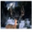

In [189]:
transforms.ToPILImage()(samples[5])

In [226]:
img = trainset[0][0]
print(trainset[0][1])
convert = transforms.ToPILImage()

6


In [225]:
surr((img + transforms.ToTensor()(res)).unsqueeze(0))

tensor([[-0.1610, -0.7338,  0.5196,  0.6811,  0.2999,  0.3889, -0.0834,  0.1896,
         -0.7620, -0.3392]], grad_fn=<AddmmBackward0>)

In [224]:
surr(img.unsqueeze(0))

tensor([[-0.1818, -0.6726,  0.4994,  0.6963,  0.2627,  0.3857, -0.0847,  0.1359,
         -0.7484, -0.2928]], grad_fn=<AddmmBackward0>)

In [230]:
(img.unsqueeze(0) + transforms.ToTensor()(res).unsqueeze(0)).shape

torch.Size([1, 3, 32, 32])

In [233]:
torch.stack([trainset[i][0] for i in range(4)]).shape

torch.Size([4, 3, 32, 32])

In [291]:
with open('poison_examples/cifar10-transfer/narcissus_poisons/0/poisons.pickle', 'rb') as handle:
    poisons = pickle.load(handle)
with open('poison_examples/cifar10-transfer/narcissus_poisons/0/base_indices.pickle', 'rb') as handle:
    base = pickle.load(handle)
with open('poison_examples/cifar10-transfer/narcissus_poisons/0/target.pickle', 'rb') as handle:
    target = pickle.load(handle)
    

In [282]:
t(poisons[0][0])

tensor([[[0.1255, 0.1059, 0.1529,  ..., 0.0118, 0.0157, 0.1020],
         [0.1098, 0.1020, 0.1294,  ..., 0.0000, 0.0471, 0.0980],
         [0.0784, 0.1765, 0.2118,  ..., 0.0157, 0.0157, 0.0039],
         ...,
         [0.9765, 0.9569, 0.7804,  ..., 0.9608, 0.7059, 0.8157],
         [0.9922, 0.9098, 0.6549,  ..., 0.9804, 0.7216, 0.6902],
         [0.9451, 0.8863, 0.8941,  ..., 0.6863, 0.7216, 0.7059]],

        [[0.3255, 0.2353, 0.3137,  ..., 0.0824, 0.0941, 0.2118],
         [0.2510, 0.2941, 0.2902,  ..., 0.1098, 0.1647, 0.1686],
         [0.1843, 0.2980, 0.4431,  ..., 0.1137, 0.0549, 0.0431],
         ...,
         [0.7961, 0.8039, 0.6784,  ..., 0.7804, 0.5647, 0.6902],
         [0.8196, 0.7686, 0.5765,  ..., 0.8275, 0.5882, 0.5569],
         [0.7333, 0.7412, 0.8235,  ..., 0.5608, 0.6000, 0.6118]],

        [[0.1922, 0.1725, 0.2235,  ..., 0.0157, 0.0235, 0.1333],
         [0.1686, 0.1647, 0.1922,  ..., 0.0039, 0.0549, 0.1137],
         [0.1098, 0.2275, 0.2706,  ..., 0.0157, 0.0235, 0.

In [290]:
torch.min(trainset[base[0]][0]-t(poisons[0][0]))*255

tensor(-16.0000)

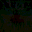

In [297]:
transforms.ToPILImage()(target[2])

In [311]:
trigger = target[2]
convert = transforms.ToPILImage()

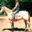

In [317]:
convert(torch.clamp(trainset[30330][0]+trigger,0,1))

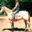

In [309]:
poisons[0][0]

In [325]:
torch.max(trainset[30330][0]+trigger)

tensor(1.0627)

In [393]:
t(res)

tensor([[[0.0157, 0.8902, 0.8863,  ..., 0.9529, 0.1255, 0.0039],
         [0.0000, 0.8784, 0.8784,  ..., 0.0000, 0.0667, 0.9608],
         [0.9451, 0.9608, 0.9961,  ..., 0.0941, 0.0314, 0.9137],
         ...,
         [1.0000, 0.0588, 0.0784,  ..., 0.8863, 0.0627, 0.0314],
         [0.8863, 0.8902, 0.9294,  ..., 0.1255, 0.0235, 0.0275],
         [0.0549, 0.9843, 0.0078,  ..., 0.0078, 0.8863, 0.8784]],

        [[1.0000, 0.8784, 0.9725,  ..., 0.8941, 0.9333, 0.0980],
         [0.1137, 0.8784, 0.8784,  ..., 0.8863, 0.0392, 0.9137],
         [0.9608, 0.8902, 0.0118,  ..., 0.9922, 0.9137, 0.8941],
         ...,
         [0.9765, 0.9333, 0.0000,  ..., 0.8941, 0.9569, 0.0078],
         [0.0627, 0.0118, 0.0471,  ..., 0.1255, 0.0078, 0.9294],
         [0.9176, 0.1020, 0.9647,  ..., 0.9294, 0.8902, 0.8784]],

        [[0.0275, 0.8784, 0.8784,  ..., 0.8784, 0.9961, 0.0078],
         [0.0039, 0.8784, 0.8784,  ..., 0.8784, 0.0667, 0.9137],
         [0.9451, 0.9569, 0.8784,  ..., 0.8784, 0.1020, 0.

4